# Loading and Preprocessing

### Mounting the Drive

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Downloading pefile Library

In [2]:
!pip install pefile

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 7.3 MB/s eta 0:00:00


### Importing Libraries

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import pickle
import pefile
import sklearn.ensemble as ek
from sklearn.model_selection import train_test_split
from sklearn import tree, linear_model
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

### Load the Dataset (malware_data.csv)

In [6]:
dataset = pd.read_csv('/content/drive/MyDrive/SEM6_Project/Malicious_File/PE_Malicious_File_Detection/malware_data.csv',sep='|')
dataset.groupby(dataset['legitimate']).size()

,0
legitimate,
0,96724
1,41323


In [8]:
dataset

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [9]:
col = dataset.columns
dataset.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [10]:
len(col)

57

In [11]:
null_counts_sum = dataset.isnull().sum()

# Display the number of null values for each column
print("Number of null values in each column:")
print(null_counts_sum)

Number of null values in each column:
Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeO

In [12]:
data_types = dataset.dtypes

# Display the data types of each column
print("Data types of columns:")
print(data_types)

Data types of columns:
Name                            object
md5                             object
Machine                          int64
SizeOfOptionalHeader             int64
Characteristics                  int64
MajorLinkerVersion               int64
MinorLinkerVersion               int64
SizeOfCode                       int64
SizeOfInitializedData            int64
SizeOfUninitializedData          int64
AddressOfEntryPoint              int64
BaseOfCode                       int64
BaseOfData                       int64
ImageBase                      float64
SectionAlignment                 int64
FileAlignment                    int64
MajorOperatingSystemVersion      int64
MinorOperatingSystemVersion      int64
MajorImageVersion                int64
MinorImageVersion                int64
MajorSubsystemVersion            int64
MinorSubsystemVersion            int64
SizeOfImage                      int64
SizeOfHeaders                    int64
CheckSum                         int64
Su

In [13]:
dataset.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [14]:
X = dataset.drop(['Name','md5','legitimate'],axis=1).values
y = dataset['legitimate'].values

### Cross Validation

In [15]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into features (X) and target variable (y)
X = dataset.drop(columns=['Name', 'md5', 'legitimate'])  # Exclude non-predictive columns
y = dataset['legitimate']

# Initialize the RandomForestClassifier (replace with your preferred model)
clf = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)  # Use 5-fold cross-validation (adjust as needed)

# Print the cross-validation scores
print("Cross-validation Scores:", cv_scores)

# Calculate and print the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean Cross-validation Score:", mean_cv_score)


Cross-validation Scores: [0.99300978 0.99221297 0.96620667 0.97200188 0.99710239]
Mean Cross-validation Score: 0.984106738942045


# 1. Feature Selection: Extra Tree Classifier

In [ ]:
X = dataset.drop(['Name','md5','legitimate'],axis=1).values
y = dataset['legitimate'].values


extratrees = ek.ExtraTreesClassifier().fit(X,y)
model = SelectFromModel(extratrees, prefit=True)
X_new = model.transform(X)
nbfeatures = X_new.shape[1]
print(nbfeatures)
X_train, X_test, y_train, y_test = train_test_split(X_new, y ,test_size=0.2)
features_extraTreeClassfier = []
index = numpy.argsort(extratrees.feature_importances_)[::-1][:nbfeatures]
for f in range(nbfeatures):
    print("%d. %s (%f)" % (f + 1, dataset.columns[2+index[f]], extratrees.feature_importances_[index[f]]))
    features_extraTreeClassfier.append(dataset.columns[2+f])

13
1. DllCharacteristics (0.139589)
2. Machine (0.130554)
3. Characteristics (0.093908)
4. VersionInformationSize (0.059802)
5. Subsystem (0.055794)
6. ImageBase (0.055762)
7. SectionsMaxEntropy (0.051159)
8. ResourcesMaxEntropy (0.050325)
9. MajorSubsystemVersion (0.048914)
10. ResourcesMinEntropy (0.045632)
11. SizeOfOptionalHeader (0.037583)
12. SectionsMinEntropy (0.019848)
13. SectionsMeanEntropy (0.019059)


### Models to be used for Classification

In [ ]:
model = {"DecisionTree":tree.DecisionTreeClassifier(max_depth=10),
         "RandomForest":ek.RandomForestClassifier(n_estimators=50),
         "Adaboost":ek.AdaBoostClassifier(n_estimators=50),
         "GradientBoosting":ek.GradientBoostingClassifier(n_estimators=50),
         "GNB":GaussianNB(),
         "KNN": KNeighborsClassifier(),
         "XGBoost": XGBClassifier(),
         "LogisticRegression": LogisticRegression(),
}

### Accuracy score for all Models Used above

In [ ]:
results_extraTreeClassifier = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train, y_train)
    score = clf.score(X_test,y_test)
    print ("%s : %s " %(algo, score))
    results_extraTreeClassifier[algo] = score

DecisionTree : 0.9904744657732706 
RandomForest : 0.9944947482796088 
Adaboost : 0.984932995291561 
GradientBoosting : 0.9888808402752626 
GNB : 0.700905469032959 
KNN : 0.9904382470119522 
XGBoost : 0.9932995291561029 
LogisticRegression : 0.7008692502716407 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Visualizing the Model's Accuracy

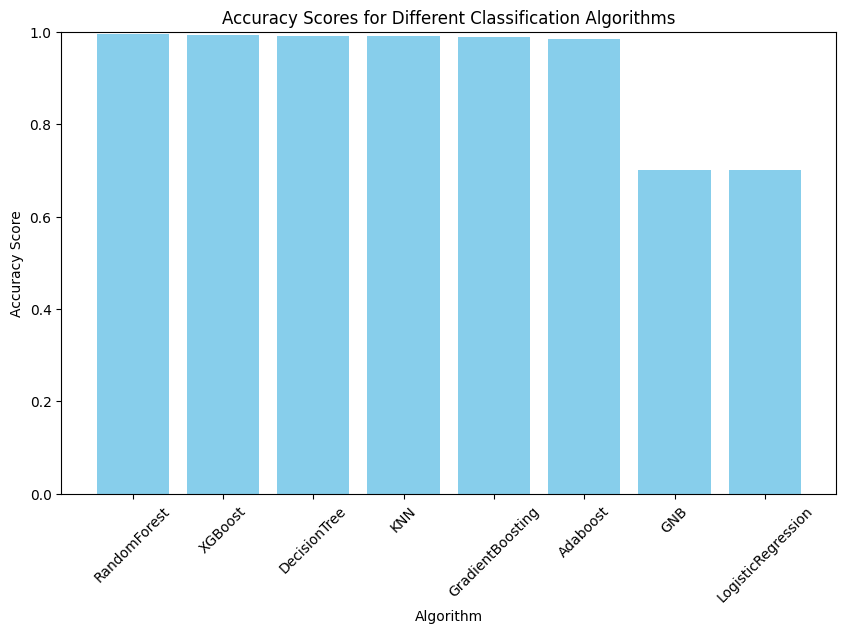

In [ ]:
import matplotlib.pyplot as plt

# Sorting the results dictionary by values (scores) in descending order
sorted_result_ETC = dict(sorted(results_extraTreeClassifier.items(), key=lambda item: item[1], reverse=True))

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_result_ETC.keys(), sorted_result_ETC.values(), color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Classification Algorithms')
plt.ylim(0, 1)  # Setting y-axis limit to 0-1 for accuracy scores
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()

### Storing the Accuracy into Excel File

In [ ]:
import pandas as pd

# Create a DataFrame from the results_extraTreeClassifier dictionary
df = pd.DataFrame(sorted_result_ETC.items(), columns=['Model', 'Accuracy Score'])

# Save the DataFrame to an Excel file
df.to_excel('model_accuracies_ETC.xlsx', index=False)

In [ ]:
winner_extraTreeClassifier = max(results_extraTreeClassifier, key=results_extraTreeClassifier.get)
ETC = print(winner_extraTreeClassifier," : ",results_extraTreeClassifier[winner_extraTreeClassifier])

RandomForest  :  0.9944947482796088


# 2. Feature Selection: Correlation Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler

# Let's assume the last column is the target variable and we want to select features based on correlation with it
target_column = dataset.columns[-1]
dataset_corr = dataset.drop(['Name','md5'],axis=1)

# Compute the correlation matrix
correlation_matrix = dataset_corr.corr()

# Sort the correlation values with the target variable
correlation_with_target = correlation_matrix[target_column].sort_values(ascending=False)

# Print the correlation values with the target variable
print("Correlation with target variable:")
print(correlation_with_target)

# Define a threshold for correlation
threshold = 0.3

# Select features that have correlation above the threshold (either positive or negative)
selected_features = correlation_with_target[abs(correlation_with_target) > threshold].index.tolist()

# Print number of selected features
Selected_Length = len(selected_features)
print("Number of Features Selected are --> ", Selected_Length)

# Print selected features
print("\nSelected Features:")
print(selected_features)

# Optionally, you can drop the target column from the selected features list if it's included
if target_column in selected_features:
    selected_features.remove(target_column)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into features (X) and target variable (y)
X = dataset_corr[selected_features]
y = dataset_corr[target_column]

# Splitting the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Correlation with target variable:
legitimate                     1.000000
Machine                        0.548835
SizeOfOptionalHeader           0.547498
Subsystem                      0.514352
MajorSubsystemVersion          0.380393
VersionInformationSize         0.379646
ResourcesMinEntropy            0.299112
Characteristics                0.221956
ExportNb                       0.134408
ImportsNbOrdinal               0.128112
FileAlignment                  0.125169
ImportsNb                      0.116415
ResourcesNb                    0.090405
MajorImageVersion              0.084410
MinorImageVersion              0.083220
SectionsMinRawsize             0.059346
SectionsMinVirtualsize         0.056466
ImportsNbDLL                   0.038395
SizeOfCode                     0.017476
MajorLinkerVersion             0.017320
SizeOfHeaders                  0.010125
ImageBase                      0.008245
MajorOperatingSystemVersion    0.002402
SectionsMeanVirtualsize        0.001734
Sectio

### Model To be used for Classification

In [ ]:
model = { "DecisionTree":tree.DecisionTreeClassifier(max_depth=10),
         "RandomForest":ek.RandomForestClassifier(n_estimators=50),
         "Adaboost":ek.AdaBoostClassifier(n_estimators=50),
         "GradientBoosting":ek.GradientBoostingClassifier(n_estimators=50),
         "GNB":GaussianNB(),
         "KNN": KNeighborsClassifier(),
         "XGBoost": XGBClassifier(),
         "LogisticRegression": LogisticRegression(),
}

In [ ]:
results_Correlation = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print ("%s : %s " %(algo, score))
    results_Correlation[algo] = score


DecisionTree : 0.9870819751297839 
RandomForest : 0.9928286852589642 
Adaboost : 0.9819147651816974 
GradientBoosting : 0.9846190993601353 
GNB : 0.9134130146082338 
KNN : 0.9893516841724013 
XGBoost : 0.9912350597609562 
LogisticRegression : 0.933671375105638 


### Visualizing the Model's Accuracy

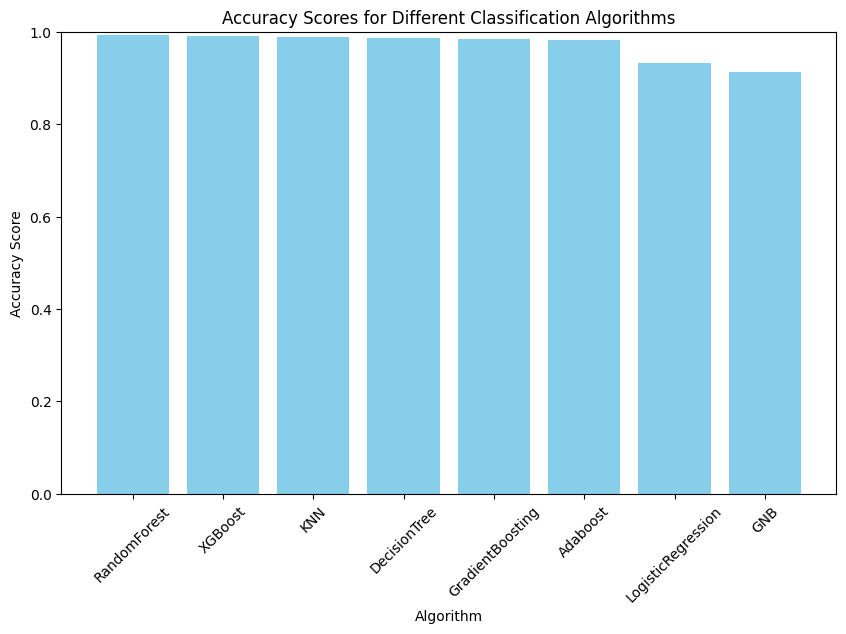

In [ ]:
import matplotlib.pyplot as plt

# Sorting the results dictionary by values (scores) in descending order
sorted_result_Correlation = dict(sorted(results_Correlation.items(), key=lambda item: item[1], reverse=True))

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_result_Correlation.keys(), sorted_result_Correlation.values(), color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Classification Algorithms')
plt.ylim(0, 1)  # Setting y-axis limit to 0-1 for accuracy scores
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()

### Storing the Accuracy into Excel File

In [ ]:
import pandas as pd

# Create a DataFrame from the results_extraTreeClassifier dictionary
df = pd.DataFrame(sorted_result_Correlation.items(), columns=['Model', 'Accuracy Score'])

# Save the DataFrame to an Excel file
df.to_excel('model_accuracies_Correlation.xlsx', index=False)

In [ ]:
winner_Correlation = max(results_Correlation, key=results_Correlation.get)
Corr = print(winner_Correlation," : ",results_Correlation[winner_Correlation])

RandomForest  :  0.9928286852589642


# 3. Feature Selection: SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

X = dataset.drop(['Name', 'md5', 'legitimate'], axis=1).values
y = dataset['legitimate'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SelectKBest feature selection
k_best_selector = SelectKBest(score_func=f_classif, k=10).fit(X, y)  # Set <k_value> to the desired number of features
X_new = k_best_selector.transform(X)
nbfeatures = X_new.shape[1]

print(nbfeatures)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

features_selectKBest = []
index = numpy.argsort(k_best_selector.scores_)[::-1][:nbfeatures]
for f in range(nbfeatures):
    print("%d. %s (%f)" % (f + 1, dataset.columns[index[f]], k_best_selector.scores_[index[f]]))
    features_selectKBest.append(dataset.columns[index[f]])

10
1. CheckSum (90932.093726)
2. SectionsMeanEntropy (88132.847747)
3. Name (59506.262698)
4. md5 (59092.899236)
5. Subsystem (51605.905548)
6. SizeOfHeaders (49658.425182)
7. ResourcesMeanEntropy (25193.436444)
8. MajorImageVersion (23354.301554)
9. ResourcesMaxSize (23247.218014)
10. NumberOfRvaAndSizes (18520.022510)


### Model to be used for Classification

In [ ]:
model = { "DecisionTree":tree.DecisionTreeClassifier(max_depth=10),
         "RandomForest":ek.RandomForestClassifier(n_estimators=50),
         "Adaboost":ek.AdaBoostClassifier(n_estimators=50),
         "GradientBoosting":ek.GradientBoostingClassifier(n_estimators=50),
         "GNB":GaussianNB(),
         "KNN": KNeighborsClassifier(),
         "XGBoost": XGBClassifier(),
         "LogisticRegression": LogisticRegression(),
}

### Accuracy score for all Models Used above

In [ ]:
results_SelectKBest = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print ("%s : %s " %(algo, score))
    results_SelectKBest[algo] = score


DecisionTree : 0.9873958710612097 
RandomForest : 0.9923578413618255 
Adaboost : 0.9802607750814922 
GradientBoosting : 0.9835566823614632 
GNB : 0.9112640347700108 
KNN : 0.9898225280695401 
XGBoost : 0.9905469032959073 
LogisticRegression : 0.9296269467584208 


### Visualizing the Model's Accuracy

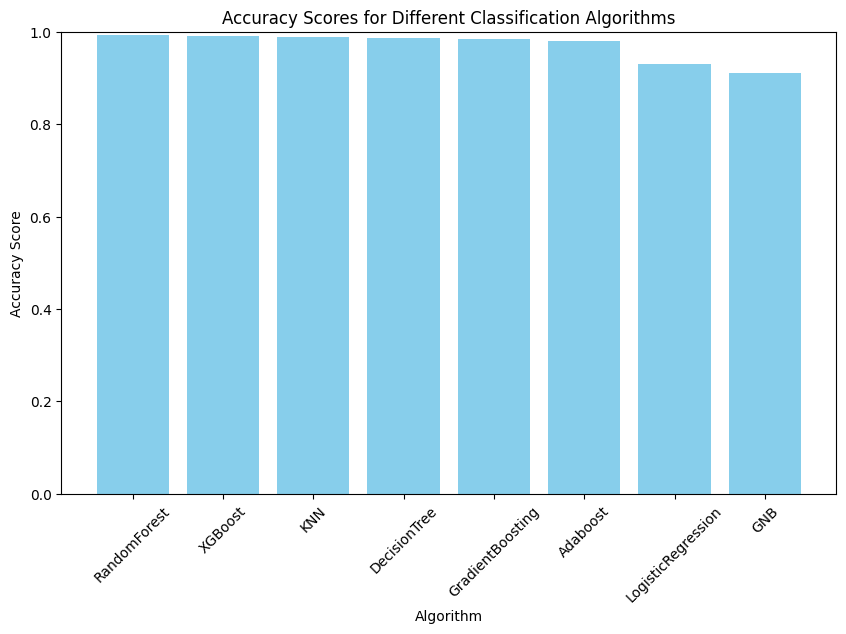

In [ ]:
import matplotlib.pyplot as plt

# Sorting the results dictionary by values (scores) in descending order
sorted_result_SelectKBest = dict(sorted(results_SelectKBest.items(), key=lambda item: item[1], reverse=True))

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_result_SelectKBest.keys(), sorted_result_SelectKBest.values(), color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Classification Algorithms')
plt.ylim(0, 1)  # Setting y-axis limit to 0-1 for accuracy scores
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()

### Storing the Accuracy into Excel File

In [ ]:
import pandas as pd

# Create a DataFrame from the results_extraTreeClassifier dictionary
df = pd.DataFrame(sorted_result_SelectKBest.items(), columns=['Model', 'Accuracy Score'])

# Save the DataFrame to an Excel file
df.to_excel('model_accuracies_SelectKBest.xlsx', index=False)

In [ ]:
winner_SelectKBest = max(results_SelectKBest, key=results_SelectKBest.get)
SKB = print(winner_SelectKBest," : ",results_SelectKBest[winner_SelectKBest])

RandomForest  :  0.9923578413618255


# 4. Feature Selection: PCA (Principal Component Analysis)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Let's assume the last column is the target variable and we want to select features based on correlation with it
target_column = dataset.columns[-1]

# Splitting the dataset into features (X) and target variable (y)
X = dataset.drop(['Name','md5','legitimate'], axis=1)  # Excluding the target column
y = dataset[target_column]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA
pca = PCA()

# Fit PCA to the scaled features
pca.fit(X_scaled)

# Determine the number of components to explain 95% of the variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1

# Print the number of components
print("Number of components to explain 95% of the variance:", n_components)

# Initialize PCA with the determined number of components
pca = PCA(n_components=n_components)

# Fit PCA to the scaled features
X_pca = pca.fit_transform(X_scaled)

# Splitting the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Now you can use X_train, X_test, y_train, y_test for further analysis or modeling


Number of components to explain 95% of the variance: 36


### Model to be used for Classification

In [ ]:
model = { "DecisionTree":tree.DecisionTreeClassifier(max_depth=10),
         "RandomForest":ek.RandomForestClassifier(n_estimators=50),
         "Adaboost":ek.AdaBoostClassifier(n_estimators=50),
         "GradientBoosting":ek.GradientBoostingClassifier(n_estimators=50),
         "GNB":GaussianNB(),
         "KNN": KNeighborsClassifier(),
         "XGBoost": XGBClassifier(),
         "LogisticRegression": LogisticRegression(),
}

### Accuracy score for all Models Used above

In [ ]:
results_PCA = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print ("%s : %s " %(algo, score))
    results_PCA[algo] = score

DecisionTree : 0.9865507666304479 
RandomForest : 0.9919835808282024 
Adaboost : 0.9781238681637088 
GradientBoosting : 0.9817940359773029 
GNB : 0.7236991428226488 
KNN : 0.9903175178075576 
XGBoost : 0.9920560183508391 
LogisticRegression : 0.9786792225039237 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Visualizing the Model's Accuracy

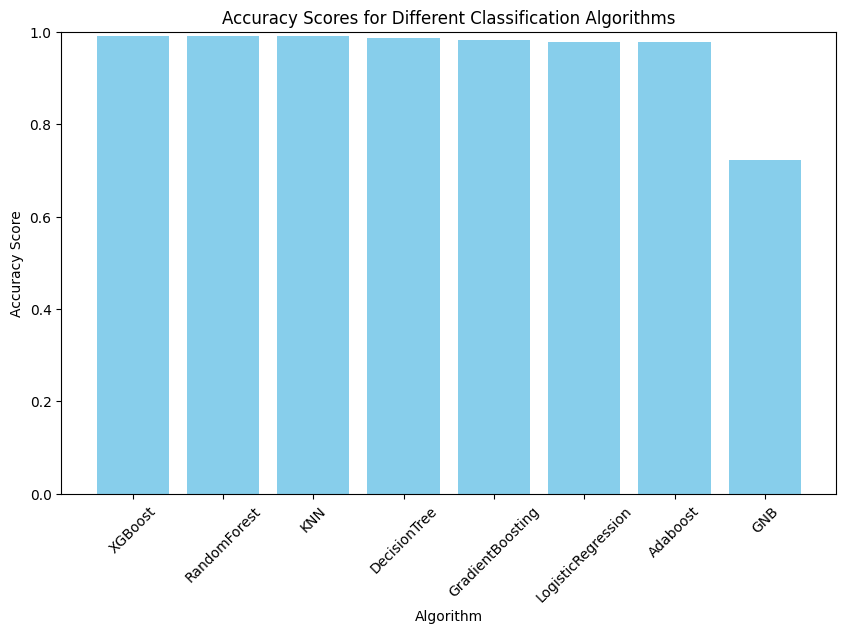

In [ ]:
import matplotlib.pyplot as plt

# Sorting the results dictionary by values (scores) in descending order
sorted_result_PCA = dict(sorted(results_PCA.items(), key=lambda item: item[1], reverse=True))

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_result_PCA.keys(), sorted_result_PCA.values(), color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Classification Algorithms')
plt.ylim(0, 1)  # Setting y-axis limit to 0-1 for accuracy scores
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()

### Storing the Accuracy into Excel File

In [ ]:
import pandas as pd

# Create a DataFrame from the results_extraTreeClassifier dictionary
df = pd.DataFrame(sorted_result_PCA.items(), columns=['Model', 'Accuracy Score'])

# Save the DataFrame to an Excel file
df.to_excel('model_accuracies_PCA.xlsx', index=False)

In [ ]:
winner_PCA = max(results_PCA, key=results_PCA.get)
PCA = print(winner_PCA," : ",results_PCA[winner_PCA])

XGBoost  :  0.9920560183508391


#Final Model Selection

In [ ]:
Final_winner_dict = {
    winner_Correlation: results_Correlation[winner_Correlation],
    winner_SelectKBest: results_SelectKBest[winner_SelectKBest],
    winner_PCA: results_PCA[winner_PCA],
    winner_extraTreeClassifier: results_extraTreeClassifier[winner_extraTreeClassifier],
}

# Finding the maximum value based on the values of the dictionary
max_value_key = max(Final_winner_dict, key=Final_winner_dict.get)
max_value = Final_winner_dict[max_value_key]

print(max_value_key, " : ", max_value)


RandomForest  :  0.9944947482796088


# Final Model = Random Forest of Extra Tree Classfier Feature Selection

# Final Prediction

In [ ]:
joblib.dump(model[winner_extraTreeClassifier],'classifier/classifier.pkl')

['classifier/classifier.pkl']

In [ ]:
open('classifier/features.pkl', 'wb').write(pickle.dumps(features_extraTreeClassfier))

251

In [ ]:
clf = model[winner_extraTreeClassifier]
res = clf.predict(X_new)
mt = confusion_matrix(y, res)
print("False positive rate : %f %%" % ((mt[0][1] / float(sum(mt[0])))*100))
print('False negative rate : %f %%' % ( (mt[1][0] / float(sum(mt[1]))*100)))

False positive rate : 0.093048 %
False negative rate : 0.166977 %


In [ ]:
# Load classifier
clf = joblib.load('classifier/classifier.pkl')
#load features
features = pickle.loads(open(os.path.join('classifier/features.pkl'),'rb').read())
features

['Machine',
 'SizeOfOptionalHeader',
 'Characteristics',
 'MajorLinkerVersion',
 'MinorLinkerVersion',
 'SizeOfCode',
 'SizeOfInitializedData',
 'SizeOfUninitializedData',
 'AddressOfEntryPoint',
 'BaseOfCode',
 'BaseOfData',
 'ImageBase',
 'SectionAlignment']

In [ ]:
features.append('legitimate')
features

['Machine',
 'SizeOfOptionalHeader',
 'Characteristics',
 'MajorLinkerVersion',
 'MinorLinkerVersion',
 'SizeOfCode',
 'SizeOfInitializedData',
 'SizeOfUninitializedData',
 'AddressOfEntryPoint',
 'BaseOfCode',
 'BaseOfData',
 'ImageBase',
 'SectionAlignment',
 'legitimate']

In [ ]:
pe_df = dataset[features]
pe_df

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,legitimate
0,332,224,258,9,0,361984,115712,0,6135,4096,372736,4194304.0,4096,1
1,332,224,3330,9,0,130560,19968,0,81778,4096,143360,771751936.0,4096,1
2,332,224,3330,9,0,517120,621568,0,350896,4096,811008,771751936.0,4096,1
3,332,224,258,9,0,585728,369152,0,451258,4096,798720,771751936.0,4096,1
4,332,224,258,9,0,294912,247296,0,217381,4096,536576,771751936.0,4096,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,332,224,258,11,0,205824,223744,0,123291,4096,212992,4194304.0,4096,0
138043,332,224,33167,2,25,37888,185344,0,40000,4096,45056,4194304.0,4096,0
138044,332,224,258,10,0,118272,380416,0,59610,4096,122880,4194304.0,4096,0
138045,332,224,33166,2,25,49152,16896,0,51216,4096,53248,4194304.0,4096,0


In [ ]:
pe_df.to_csv("final_pe_data.csv",index = False)

In [ ]:
%%writefile Final_Testing.py
"""
this file extracts the required information of a given file using the library PE

"""

import pefile
import os
import array
import math
import pickle
import joblib
import sys
import argparse



def get_entropy(data):
    if len(data) == 0:
        return 0.0
    occurences = array.array('L', [0]*256)
    for x in data:
        occurences[x if isinstance(x, int) else ord(x)] += 1
    entropy = 0
    for x in occurences:
        if x:
            p_x = float(x) / len(data)
            entropy -= p_x*math.log(p_x, 2)
    return entropy


def get_resources(pe):
    """Extract resources :
    [entropy, size]"""
    resources = []
    if hasattr(pe, 'DIRECTORY_ENTRY_RESOURCE'):
        try:
            for resource_type in pe.DIRECTORY_ENTRY_RESOURCE.entries:
                if hasattr(resource_type, 'directory'):
                    for resource_id in resource_type.directory.entries:
                        if hasattr(resource_id, 'directory'):
                            for resource_lang in resource_id.directory.entries:
                                data = pe.get_data(resource_lang.data.struct.OffsetToData, resource_lang.data.struct.Size)
                                size = resource_lang.data.struct.Size
                                entropy = get_entropy(data)

                                resources.append([entropy, size])
        except Exception as e:
            return resources
    return resources

def get_version_info(pe):
    """Return version infos"""
    res = {}
    for fileinfo in pe.FileInfo:
        if fileinfo.Key == 'StringFileInfo':
            for st in fileinfo.StringTable:
                for entry in st.entries.items():
                    res[entry[0]] = entry[1]
        if fileinfo.Key == 'VarFileInfo':
            for var in fileinfo.Var:
                res[var.entry.items()[0][0]] = var.entry.items()[0][1]
    if hasattr(pe, 'VS_FIXEDFILEINFO'):
        res['flags'] = pe.VS_FIXEDFILEINFO.FileFlags
        res['os'] = pe.VS_FIXEDFILEINFO.FileOS
        res['type'] = pe.VS_FIXEDFILEINFO.FileType
        res['file_version'] = pe.VS_FIXEDFILEINFO.FileVersionLS
        res['product_version'] = pe.VS_FIXEDFILEINFO.ProductVersionLS
        res['signature'] = pe.VS_FIXEDFILEINFO.Signature
        res['struct_version'] = pe.VS_FIXEDFILEINFO.StrucVersion
    return res

#extract the info for a given file
def extract_infos(fpath):
    res = {}
    pe = pefile.PE(fpath)
    res['Machine'] = pe.FILE_HEADER.Machine
    res['SizeOfOptionalHeader'] = pe.FILE_HEADER.SizeOfOptionalHeader
    res['Characteristics'] = pe.FILE_HEADER.Characteristics
    res['MajorLinkerVersion'] = pe.OPTIONAL_HEADER.MajorLinkerVersion
    res['MinorLinkerVersion'] = pe.OPTIONAL_HEADER.MinorLinkerVersion
    res['SizeOfCode'] = pe.OPTIONAL_HEADER.SizeOfCode
    res['SizeOfInitializedData'] = pe.OPTIONAL_HEADER.SizeOfInitializedData
    res['SizeOfUninitializedData'] = pe.OPTIONAL_HEADER.SizeOfUninitializedData
    res['AddressOfEntryPoint'] = pe.OPTIONAL_HEADER.AddressOfEntryPoint
    res['BaseOfCode'] = pe.OPTIONAL_HEADER.BaseOfCode
    try:
        res['BaseOfData'] = pe.OPTIONAL_HEADER.BaseOfData
    except AttributeError:
        res['BaseOfData'] = 0
    res['ImageBase'] = pe.OPTIONAL_HEADER.ImageBase
    res['SectionAlignment'] = pe.OPTIONAL_HEADER.SectionAlignment
    res['FileAlignment'] = pe.OPTIONAL_HEADER.FileAlignment
    res['MajorOperatingSystemVersion'] = pe.OPTIONAL_HEADER.MajorOperatingSystemVersion
    res['MinorOperatingSystemVersion'] = pe.OPTIONAL_HEADER.MinorOperatingSystemVersion
    res['MajorImageVersion'] = pe.OPTIONAL_HEADER.MajorImageVersion
    res['MinorImageVersion'] = pe.OPTIONAL_HEADER.MinorImageVersion
    res['MajorSubsystemVersion'] = pe.OPTIONAL_HEADER.MajorSubsystemVersion
    res['MinorSubsystemVersion'] = pe.OPTIONAL_HEADER.MinorSubsystemVersion
    res['SizeOfImage'] = pe.OPTIONAL_HEADER.SizeOfImage
    res['SizeOfHeaders'] = pe.OPTIONAL_HEADER.SizeOfHeaders
    res['CheckSum'] = pe.OPTIONAL_HEADER.CheckSum
    res['Subsystem'] = pe.OPTIONAL_HEADER.Subsystem
    res['DllCharacteristics'] = pe.OPTIONAL_HEADER.DllCharacteristics
    res['SizeOfStackReserve'] = pe.OPTIONAL_HEADER.SizeOfStackReserve
    res['SizeOfStackCommit'] = pe.OPTIONAL_HEADER.SizeOfStackCommit
    res['SizeOfHeapReserve'] = pe.OPTIONAL_HEADER.SizeOfHeapReserve
    res['SizeOfHeapCommit'] = pe.OPTIONAL_HEADER.SizeOfHeapCommit
    res['LoaderFlags'] = pe.OPTIONAL_HEADER.LoaderFlags
    res['NumberOfRvaAndSizes'] = pe.OPTIONAL_HEADER.NumberOfRvaAndSizes

    # Sections
    res['SectionsNb'] = len(pe.sections)
    entropy = list(map(lambda x:x.get_entropy(), pe.sections))
    res['SectionsMeanEntropy'] = sum(entropy)/float(len(entropy))
    res['SectionsMinEntropy'] = min(entropy)
    res['SectionsMaxEntropy'] = max(entropy)
    raw_sizes = list(map(lambda x:x.SizeOfRawData, pe.sections))
    res['SectionsMeanRawsize'] = sum(raw_sizes)/float(len(raw_sizes))
    res['SectionsMinRawsize'] = min(raw_sizes)
    res['SectionsMaxRawsize'] = max(raw_sizes)
    virtual_sizes = list(map(lambda x:x.Misc_VirtualSize, pe.sections))
    res['SectionsMeanVirtualsize'] = sum(virtual_sizes)/float(len(virtual_sizes))
    res['SectionsMinVirtualsize'] = min(virtual_sizes)
    res['SectionMaxVirtualsize'] = max(virtual_sizes)

    #Imports
    try:
        res['ImportsNbDLL'] = len(pe.DIRECTORY_ENTRY_IMPORT)
        imports = sum([x.imports for x in pe.DIRECTORY_ENTRY_IMPORT], [])
        res['ImportsNb'] = len(imports)
        res['ImportsNbOrdinal'] = len(list(filter(lambda x:x.name is None, imports)))
    except AttributeError:
        res['ImportsNbDLL'] = 0
        res['ImportsNb'] = 0
        res['ImportsNbOrdinal'] = 0

    #Exports
    try:
        res['ExportNb'] = len(pe.DIRECTORY_ENTRY_EXPORT.symbols)
    except AttributeError:
        # No export
        res['ExportNb'] = 0
    #Resources
    resources= get_resources(pe)
    res['ResourcesNb'] = len(resources)
    if len(resources)> 0:
        entropy = list(map(lambda x:x[0], resources))
        res['ResourcesMeanEntropy'] = sum(entropy)/float(len(entropy))
        res['ResourcesMinEntropy'] = min(entropy)
        res['ResourcesMaxEntropy'] = max(entropy)
        sizes = list(map(lambda x:x[1], resources))
        res['ResourcesMeanSize'] = sum(sizes)/float(len(sizes))
        res['ResourcesMinSize'] = min(sizes)
        res['ResourcesMaxSize'] = max(sizes)
    else:
        res['ResourcesNb'] = 0
        res['ResourcesMeanEntropy'] = 0
        res['ResourcesMinEntropy'] = 0
        res['ResourcesMaxEntropy'] = 0
        res['ResourcesMeanSize'] = 0
        res['ResourcesMinSize'] = 0
        res['ResourcesMaxSize'] = 0

    # Load configuration size
    try:
        res['LoadConfigurationSize'] = pe.DIRECTORY_ENTRY_LOAD_CONFIG.struct.Size
    except AttributeError:
        res['LoadConfigurationSize'] = 0


    # Version configuration size
    try:
        version_infos = get_version_info(pe)
        res['VersionInformationSize'] = len(version_infos.keys())
    except AttributeError:
        res['VersionInformationSize'] = 0
    return res


if __name__ == '__main__':

    clf = joblib.load('classifier/classifier.pkl')
    features = pickle.loads(open(os.path.join('classifier/features.pkl'),'rb').read())
    data = extract_infos(sys.argv[1])
    pe_features = list(map(lambda x:data[x], features))

    res= clf.predict([pe_features])[0]
    print ('The file %s is %s' % (os.path.basename(sys.argv[1]),['legitimate', 'malicious'][res]))

Overwriting Final_Testing.py


In [ ]:
%run Final_Testing.py /content/drive/MyDrive/SEM6_Project/Malicious_File/PE_Malicious_File_Detection/Test_Sample/sublime_text_build_4169_x64_setup.exe

The file sublime_text_build_4169_x64_setup.exe is legitimate


Checking................

In [ ]:
!git clone https://github.com/iosifache/DikeDataset.git

Cloning into 'DikeDataset'...
remote: Enumerating objects: 11989, done.
remote: Counting objects: 100% (11989/11989), done.
^C


### Legitimate File Prediction

In [ ]:
%run Final_Testing.py 016584e586de67b725ac1e3974fcca320bf81c8c489ebb17d9909735d517e7ae.exe

The file 016584e586de67b725ac1e3974fcca320bf81c8c489ebb17d9909735d517e7ae.exe is legitimate


In [ ]:
%run Final_Testing.py 0758b74302db6964914e3117fb52f6b0cd4dd84d2b6c1df1aeabd2d4343acf88.exe

The file 0758b74302db6964914e3117fb52f6b0cd4dd84d2b6c1df1aeabd2d4343acf88.exe is legitimate


# SS

In [ ]:
clf.score(X_test, y_test)

0.9944947482796088

In [ ]:
"""

Machine = 332
SizeOfOptionalHeader = 224
Characteristics = 258
MajorLinkerVersion = 9
MinorLinkerVersion = 0
SizeOfCode = 294912
SizeOfInitializedData = 247296
SizeOfUninitializedData = 0
AddressOfEntryPoint = 217381
BaseOfCode = 4096
BaseOfData = 536576
ImageBase = 771751936
SectionAlignment = 4096

"""

In [ ]:
data = [[332, 224, 258, 10, 0, 28672, 445952, 16896, 14819, 4096, 32768, 4194304, 4096]]

# [332, 224, 290, 9, 0, 823808, 650240, 0, 587663, 4096, 831488, 4194304, 4096],

In [ ]:
df = pd.DataFrame(data, columns=[
    'Machine',
    'SizeOfOptionalHeader',
    'Characteristics',
    'MajorLinkerVersion',
    'MinorLinkerVersion',
    'SizeOfCode',
    'SizeOfInitializedData',
    'SizeOfUninitializedData',
    'AddressOfEntryPoint',
    'BaseOfCode',
    'BaseOfData',
    'ImageBase',
    'SectionAlignment',
    ])

df.head()
print(df.dtypes)

Machine                    int64
SizeOfOptionalHeader       int64
Characteristics            int64
MajorLinkerVersion         int64
MinorLinkerVersion         int64
SizeOfCode                 int64
SizeOfInitializedData      int64
SizeOfUninitializedData    int64
AddressOfEntryPoint        int64
BaseOfCode                 int64
BaseOfData                 int64
ImageBase                  int64
SectionAlignment           int64
dtype: object


In [ ]:
df.head()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment
0,332,224,258,10,0,28672,445952,16896,14819,4096,32768,4194304,4096


In [ ]:
prediction = clf.predict(df)
probability = clf.predict_proba(df)[:,1]

"""

threshold = 0.5  # adjust this threshold as needed
probability = clf.predict_proba(df)[:,1]
prediction = [1 if prob > threshold else 0 for prob in probability]

"""

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
print(prediction)

[0]


In [ ]:
print(probability)

[0.44]


In [ ]:
if prediction == [1]:
    print("Based on the Details provided, the file is Legitimate")
    print(f"Confidence level is {np.round(probability*100, 2)}")
else:
    print("Based on the Details provided, the file is Malicious")
    print(f"Confidence level is {np.round(probability*100, 2)}")

Based on the Details provided, the file is Malicious
Confidence level is [44.]
